In [1]:
import numpy as np

import gym
import stable_baselines
from stable_baselines import A2C, ACER, ACKTR, DQN, DDPG, SAC, PPO1, PPO2, TD3, TRPO
from stable_baselines.common.env_checker import check_env
from stable_baselines.common.policies import MlpPolicy

from fakegym.fakegym import FakeGym
import importlib

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
class MyObservation():
    def __init__(self, env):
        self.env = env
        self.gps_actual = None
        self.gps_target = None
        self.distance = None
        self.touching = None

    def _update(self):
        self.gps_actual = self.env.state_object.gps_actual
        self.gps_target = self.env.state_object.gps_target
        self.distance = self.env.state_object.distance
        self.touching = self.env.state_object.touching

    def shape(self):
        """Make sure length is correct here.In this example:
        gps_actual: 2
        gps_target: 2
        distance:   4
        touching:   1
        =================
                   (9, )
        
        """
        return (9, )

    def get(self, env):
        """Get observation as numpy array."""
        self._update()
        
        arr = np.empty(0)
        arr = np.hstack((arr, np.array(self.gps_actual)))
        arr = np.hstack((arr, np.array(self.gps_target)))
        arr = np.hstack((arr, np.array(self.distance)))
        arr = np.hstack((arr, np.array(self.touching)))
        
        return arr
    

class MyEnv(FakeGym):
    def __init__(self, seed=None, N=10, num_of_sensors=4, obstacles_each=2,
                 step_range=(1, 1), action_type="discrete",
                 discrete_action_shaping="flatten", obs=MyObservation):
        super(MyEnv, self).__init__(seed, N, num_of_sensors, obstacles_each, step_range, action_type, discrete_action_shaping, obs)
        

    def calc_reward(self):
        """Calculate reward function.

        Idea(Mats):
        - negative reward for normal move so that james moves faster to goal
        - still lower negative reward if james gets closer to goal
        - high positive award for reaching it
        - high negative award to hitting a wall
        - epsilon only to divide never by 0

        """
        if self.gps_actual == self.gps_target:
            reward = 1000
        else:
            epsilon = 10**-5
            cost_step = 1
            distance = self.get_target_distance()+epsilon
            cost_distance = (distance**0.4)/(distance)
            reward_factor = -1
            reward = reward_factor * (cost_step * cost_distance)
            if self.state_object:
                reward = reward - 10
        return reward
        
        
    def check_done(self):
        if self.com.time_steps == 1000:
            return True
        if self.gps_actual == self.gps_target:
            return True
        return False


env = MyEnv()
check_env(env)

/home/pj/anaconda3/envs/spinningup/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
time_steps = 5*10**4
reward_function = "nReward2"
fake = "WebotFakeMini"
name = "TRPO_pj1"
model_name = "PPO_{}_{}_{}_{}".format(fake, name, reward_function, time_steps)

model = PPO1("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=time_steps, log_interval=100)
model.save("models/fake/{}".format(model_name))
del model





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
********** Iteration 0 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00478 |      -0.01386 |      2.77e+04 |       0.00039 |       1.38587
     -0.01848 |      -0.01383 |      2.74e+04 |       0.00296 |       1.38315
     -0.02014 |      -0.01378 |      2.71e+04 |       0.00802 |       1.37777
     -0.02232 |      -0.01376 |      2.69e+04 |       0.00945 |       1.37624
Evaluating losses...
     -0.02746 |      -0.01377 |      2.67e+04 |       0.00841 |       1.37734
----------------------------------
| EpThisIter      | 0            |
| EpisodesSoFar   | 0            |
| TimeElapsed     | 1.26         |
| TimestepsSoFar  | 256          |
| ev_tdlam_before | 0.000433     |
| loss_ent 

     -0.01464 |      -0.01354 |      7.09e+04 |       0.00477 |       1.35355
     -0.01991 |      -0.01352 |      7.09e+04 |       0.00969 |       1.35209
Evaluating losses...
     -0.02464 |      -0.01351 |      7.08e+04 |       0.01192 |       1.35073
----------------------------------
| EpLenMean       | 114          |
| EpRewMean       | -181         |
| EpThisIter      | 2            |
| EpisodesSoFar   | 10           |
| TimeElapsed     | 3.89         |
| TimestepsSoFar  | 1280         |
| ev_tdlam_before | -0.00123     |
| loss_ent        | 1.350725     |
| loss_kl         | 0.011916373  |
| loss_pol_entpen | -0.01350725  |
| loss_pol_surr   | -0.024644814 |
| loss_vf_loss    | 70831.59     |
----------------------------------
********** Iteration 5 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00025 |      -0.01367 |      2.74e+04 |      3.92e-05 |       1.36666
     -0.00282 |      -0.01365 |      2.72e+04 |  

     -0.00343 |      -0.01360 |      2.64e+04 |       0.00307 |       1.36021
     -0.00468 |      -0.01358 |      2.63e+04 |       0.00539 |       1.35779
Evaluating losses...
     -0.00599 |      -0.01356 |      2.62e+04 |       0.00655 |       1.35595
-----------------------------------
| EpLenMean       | 174           |
| EpRewMean       | -803          |
| EpThisIter      | 0             |
| EpisodesSoFar   | 14            |
| TimeElapsed     | 9.46          |
| TimestepsSoFar  | 3328          |
| ev_tdlam_before | -0.000111     |
| loss_ent        | 1.3559504     |
| loss_kl         | 0.006549073   |
| loss_pol_entpen | -0.0135595035 |
| loss_pol_surr   | -0.0059914626 |
| loss_vf_loss    | 26203.02      |
-----------------------------------
********** Iteration 13 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00011 |      -0.01345 |      8.04e+04 |       0.00011 |       1.34485
     -0.00538 |      -0.01347 |   

     -0.01415 |      -0.01290 |      4.79e+04 |       0.01317 |       1.28972
     -0.01957 |      -0.01289 |      4.79e+04 |       0.01175 |       1.28927
Evaluating losses...
     -0.02219 |      -0.01295 |      4.79e+04 |       0.00820 |       1.29546
----------------------------------
| EpLenMean       | 208          |
| EpRewMean       | -1.24e+03    |
| EpThisIter      | 1            |
| EpisodesSoFar   | 25           |
| TimeElapsed     | 14.4         |
| TimestepsSoFar  | 5376         |
| ev_tdlam_before | -3.28e-05    |
| loss_ent        | 1.2954593    |
| loss_kl         | 0.00820244   |
| loss_pol_entpen | -0.012954593 |
| loss_pol_surr   | -0.022185797 |
| loss_vf_loss    | 47857.785    |
----------------------------------
********** Iteration 21 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00335 |      -0.01323 |      2.64e+04 |       0.00037 |       1.32310
     -0.00015 |      -0.01325 |      2.63e+04 | 

     -0.01359 |      -0.01307 |      1.00e+05 |       0.00218 |       1.30741
     -0.01912 |      -0.01313 |      1.00e+05 |       0.00630 |       1.31296
Evaluating losses...
     -0.02208 |      -0.01315 |      1.00e+05 |       0.00929 |       1.31530
----------------------------------
| EpLenMean       | 194          |
| EpRewMean       | -1.1e+03     |
| EpThisIter      | 4            |
| EpisodesSoFar   | 38           |
| TimeElapsed     | 19.6         |
| TimestepsSoFar  | 7424         |
| ev_tdlam_before | 1.1e-05      |
| loss_ent        | 1.3153044    |
| loss_kl         | 0.00929318   |
| loss_pol_entpen | -0.013153044 |
| loss_pol_surr   | -0.022076337 |
| loss_vf_loss    | 100407.13    |
----------------------------------
********** Iteration 29 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00069 |      -0.01291 |      9.07e+04 |       0.00016 |       1.29058
     -0.00672 |      -0.01287 |      9.07e+04 | 

     -0.01812 |      -0.01310 |      1.98e+05 |       0.01079 |       1.31035
     -0.02405 |      -0.01305 |      1.96e+05 |       0.00732 |       1.30471
Evaluating losses...
     -0.02703 |      -0.01299 |      1.95e+05 |       0.00608 |       1.29939
----------------------------------
| EpLenMean       | 148          |
| EpRewMean       | -582         |
| EpThisIter      | 9            |
| EpisodesSoFar   | 64           |
| TimeElapsed     | 24.4         |
| TimestepsSoFar  | 9472         |
| ev_tdlam_before | 0.00198      |
| loss_ent        | 1.2993913    |
| loss_kl         | 0.006077634  |
| loss_pol_entpen | -0.012993911 |
| loss_pol_surr   | -0.027025778 |
| loss_vf_loss    | 195360.97    |
----------------------------------
********** Iteration 37 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00114 |      -0.01303 |      7.37e+04 |       0.00034 |       1.30330
     -0.00387 |      -0.01303 |      7.35e+04 | 

     -0.01095 |      -0.01288 |      1.12e+05 |       0.00362 |       1.28760
     -0.01420 |      -0.01276 |      1.12e+05 |       0.00836 |       1.27592
Evaluating losses...
     -0.01746 |      -0.01274 |      1.12e+05 |       0.00861 |       1.27370
-----------------------------------
| EpLenMean       | 141           |
| EpRewMean       | -515          |
| EpThisIter      | 4             |
| EpisodesSoFar   | 81            |
| TimeElapsed     | 29.2          |
| TimestepsSoFar  | 11520         |
| ev_tdlam_before | 0.00111       |
| loss_ent        | 1.2737        |
| loss_kl         | 0.008612063   |
| loss_pol_entpen | -0.0127369985 |
| loss_pol_surr   | -0.017463537  |
| loss_vf_loss    | 111640.2      |
-----------------------------------
********** Iteration 45 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00018 |      -0.01284 |      2.85e+04 |      6.67e-05 |       1.28378
     -0.00679 |      -0.01275 |   

     -0.01625 |      -0.01224 |      1.40e+05 |       0.00738 |       1.22395
     -0.01851 |      -0.01219 |      1.39e+05 |       0.01116 |       1.21881
Evaluating losses...
     -0.02138 |      -0.01218 |      1.39e+05 |       0.01075 |       1.21812
----------------------------------
| EpLenMean       | 141          |
| EpRewMean       | -523         |
| EpThisIter      | 5            |
| EpisodesSoFar   | 96           |
| TimeElapsed     | 34           |
| TimestepsSoFar  | 13568        |
| ev_tdlam_before | 0.0183       |
| loss_ent        | 1.2181184    |
| loss_kl         | 0.010750233  |
| loss_pol_entpen | -0.012181184 |
| loss_pol_surr   | -0.021375656 |
| loss_vf_loss    | 139398.69    |
----------------------------------
********** Iteration 53 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00027 |      -0.01185 |      4.79e+04 |       0.00018 |       1.18474
     -0.00540 |      -0.01169 |      4.80e+04 | 

     -0.01224 |      -0.01106 |      2.44e+04 |       0.00717 |       1.10568
     -0.00800 |      -0.01109 |      2.32e+04 |       0.01518 |       1.10904
Evaluating losses...
     -0.00950 |      -0.01098 |      2.25e+04 |       0.01884 |       1.09824
----------------------------------
| EpLenMean       | 83.1         |
| EpRewMean       | 115          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 128          |
| TimeElapsed     | 39.2         |
| TimestepsSoFar  | 15616        |
| ev_tdlam_before | -0.102       |
| loss_ent        | 1.0982368    |
| loss_kl         | 0.018841082  |
| loss_pol_entpen | -0.010982368 |
| loss_pol_surr   | -0.009504353 |
| loss_vf_loss    | 22525.764    |
----------------------------------
********** Iteration 61 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00571 |      -0.01061 |      2.71e+04 |       0.00384 |       1.06133
     -0.00379 |      -0.01047 |      2.61e+04 | 

     -0.00619 |      -0.01150 |      2.65e+04 |       0.00890 |       1.15033
     -0.00583 |      -0.01161 |      2.64e+04 |       0.00479 |       1.16091
Evaluating losses...
     -0.00841 |      -0.01169 |      2.64e+04 |       0.00308 |       1.16947
----------------------------------
| EpLenMean       | 91.3         |
| EpRewMean       | 17.6         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 143          |
| TimeElapsed     | 44.4         |
| TimestepsSoFar  | 17664        |
| ev_tdlam_before | 0.00277      |
| loss_ent        | 1.1694746    |
| loss_kl         | 0.003081887  |
| loss_pol_entpen | -0.011694746 |
| loss_pol_surr   | -0.008405019 |
| loss_vf_loss    | 26358.992    |
----------------------------------
********** Iteration 69 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00317 |      -0.01172 |      2.67e+04 |       0.00140 |       1.17159
     -0.00804 |      -0.01177 |      2.66e+04 | 

     -0.00331 |      -0.01000 |      2.64e+04 |       0.00167 |       1.00008
     -0.00402 |      -0.01007 |      2.55e+04 |       0.00270 |       1.00717
Evaluating losses...
     -0.00506 |      -0.01011 |      2.50e+04 |       0.00394 |       1.01106
----------------------------------
| EpLenMean       | 92.5         |
| EpRewMean       | -5.33        |
| EpThisIter      | 0            |
| EpisodesSoFar   | 165          |
| TimeElapsed     | 49.8         |
| TimestepsSoFar  | 19712        |
| ev_tdlam_before | 0.00294      |
| loss_ent        | 1.0110613    |
| loss_kl         | 0.0039421385 |
| loss_pol_entpen | -0.010110612 |
| loss_pol_surr   | -0.005055491 |
| loss_vf_loss    | 24972.973    |
----------------------------------
********** Iteration 77 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00029 |      -0.01055 |      1.87e+05 |      7.18e-05 |       1.05504
     -0.00517 |      -0.01057 |      1.86e+05 | 

     -0.00885 |      -0.01150 |      2.09e+05 |       0.00351 |       1.14955
     -0.01170 |      -0.01144 |      2.08e+05 |       0.00651 |       1.14408
     -0.01548 |      -0.01141 |      2.08e+05 |       0.00611 |       1.14138
Evaluating losses...
     -0.01750 |      -0.01140 |      2.08e+05 |       0.00587 |       1.14049
----------------------------------
| EpLenMean       | 77.8         |
| EpRewMean       | 152          |
| EpThisIter      | 12           |
| EpisodesSoFar   | 201          |
| TimeElapsed     | 55.1         |
| TimestepsSoFar  | 21760        |
| ev_tdlam_before | 0.0214       |
| loss_ent        | 1.1404868    |
| loss_kl         | 0.005867426  |
| loss_pol_entpen | -0.011404868 |
| loss_pol_surr   | -0.01749571  |
| loss_vf_loss    | 207677.98    |
----------------------------------
********** Iteration 85 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00041 |      -0.01149 |      1.62e+05 | 

     -0.00142 |      -0.01176 |      6.64e+04 |      8.23e-05 |       1.17643
     -0.00600 |      -0.01179 |      6.55e+04 |       0.00296 |       1.17918
     -0.00830 |      -0.01181 |      6.50e+04 |       0.00532 |       1.18077
     -0.01042 |      -0.01178 |      6.46e+04 |       0.00195 |       1.17772
Evaluating losses...
     -0.01295 |      -0.01172 |      6.45e+04 |       0.00214 |       1.17245
-----------------------------------
| EpLenMean       | 90.2          |
| EpRewMean       | 13.7          |
| EpThisIter      | 2             |
| EpisodesSoFar   | 217           |
| TimeElapsed     | 60.8          |
| TimestepsSoFar  | 23808         |
| ev_tdlam_before | 0.132         |
| loss_ent        | 1.1724547     |
| loss_kl         | 0.002136359   |
| loss_pol_entpen | -0.0117245475 |
| loss_pol_surr   | -0.012948817  |
| loss_vf_loss    | 64483.61      |
-----------------------------------
********** Iteration 93 ************
Optimizing...
     pol_surr |    pol_entpen |   

      0.00131 |      -0.01081 |      3.09e+04 |      4.20e-05 |       1.08144
     -0.00424 |      -0.01098 |      3.09e+04 |       0.00299 |       1.09819
     -0.00109 |      -0.01108 |      3.09e+04 |       0.00501 |       1.10797
     -0.00320 |      -0.01102 |      3.08e+04 |       0.00078 |       1.10209
Evaluating losses...
     -0.00495 |      -0.01104 |      3.07e+04 |       0.00074 |       1.10413
-----------------------------------
| EpLenMean       | 45            |
| EpRewMean       | 526           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 275           |
| TimeElapsed     | 67            |
| TimestepsSoFar  | 25856         |
| ev_tdlam_before | -0.0549       |
| loss_ent        | 1.1041263     |
| loss_kl         | 0.00073733233 |
| loss_pol_entpen | -0.011041264  |
| loss_pol_surr   | -0.0049467236 |
| loss_vf_loss    | 30742.393     |
-----------------------------------
********** Iteration 101 ************
Optimizing...
     pol_surr |    pol_entpen |  

     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00092 |      -0.01019 |      1.36e+05 |      9.07e-05 |       1.01901
     -0.00360 |      -0.01015 |      1.35e+05 |       0.00145 |       1.01500
     -0.00630 |      -0.01015 |      1.34e+05 |       0.00310 |       1.01538
     -0.00856 |      -0.01022 |      1.32e+05 |       0.00151 |       1.02193
Evaluating losses...
     -0.01006 |      -0.01025 |      1.32e+05 |       0.00129 |       1.02493
----------------------------------
| EpLenMean       | 35.5         |
| EpRewMean       | 625          |
| EpThisIter      | 6            |
| EpisodesSoFar   | 328          |
| TimeElapsed     | 72.2         |
| TimestepsSoFar  | 27904        |
| ev_tdlam_before | 0.0346       |
| loss_ent        | 1.0249307    |
| loss_kl         | 0.0012868284 |
| loss_pol_entpen | -0.010249306 |
| loss_pol_surr   | -0.010063671 |
| loss_vf_loss    | 131668.62    |
----------------------------------
********** Iteration 

********** Iteration 116 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00051 |      -0.01206 |      2.56e+04 |       0.00054 |       1.20645
     -0.00725 |      -0.01232 |      2.16e+04 |       0.00387 |       1.23165
     -0.01027 |      -0.01234 |      1.86e+04 |       0.00312 |       1.23404
     -0.01176 |      -0.01235 |      1.67e+04 |       0.00326 |       1.23454
Evaluating losses...
     -0.01335 |      -0.01243 |      1.58e+04 |       0.00470 |       1.24306
----------------------------------
| EpLenMean       | 52.6         |
| EpRewMean       | 435          |
| EpThisIter      | 1            |
| EpisodesSoFar   | 348          |
| TimeElapsed     | 77.1         |
| TimestepsSoFar  | 29952        |
| ev_tdlam_before | -0.574       |
| loss_ent        | 1.2430574    |
| loss_kl         | 0.0047029434 |
| loss_pol_entpen | -0.012430574 |
| loss_pol_surr   | -0.013347857 |
| loss_vf_loss    | 15792.909    |
----

********** Iteration 124 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00050 |      -0.01037 |      1.49e+05 |      5.21e-06 |       1.03695
     -0.00051 |      -0.01036 |      1.48e+05 |      7.83e-05 |       1.03623
     -0.00342 |      -0.01037 |      1.48e+05 |       0.00044 |       1.03698
     -0.00563 |      -0.01041 |      1.48e+05 |       0.00085 |       1.04068
Evaluating losses...
     -0.00707 |      -0.01043 |      1.47e+05 |       0.00121 |       1.04344
----------------------------------
| EpLenMean       | 51           |
| EpRewMean       | 454          |
| EpThisIter      | 7            |
| EpisodesSoFar   | 389          |
| TimeElapsed     | 82           |
| TimestepsSoFar  | 32000        |
| ev_tdlam_before | 0.124        |
| loss_ent        | 1.043438     |
| loss_kl         | 0.0012122613 |
| loss_pol_entpen | -0.01043438  |
| loss_pol_surr   | -0.007066626 |
| loss_vf_loss    | 147460.6     |
----

********** Iteration 132 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -9.12e-05 |      -0.01165 |      2.61e+04 |      2.27e-05 |       1.16506
      0.00041 |      -0.01173 |      2.53e+04 |       0.00038 |       1.17331
     -0.00245 |      -0.01168 |      2.50e+04 |       0.00044 |       1.16816
     -0.00372 |      -0.01158 |      2.47e+04 |       0.00069 |       1.15842
Evaluating losses...
     -0.00397 |      -0.01158 |      2.46e+04 |       0.00105 |       1.15761
-----------------------------------
| EpLenMean       | 63.6          |
| EpRewMean       | 310           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 407           |
| TimeElapsed     | 88.4          |
| TimestepsSoFar  | 34048         |
| ev_tdlam_before | -0.108        |
| loss_ent        | 1.1576097     |
| loss_kl         | 0.0010501702  |
| loss_pol_entpen | -0.011576097  |
| loss_pol_surr   | -0.0039680554 |
| loss_vf_loss    | 24639.7

********** Iteration 140 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00098 |      -0.01109 |      1.64e+05 |      2.87e-05 |       1.10887
     -0.00239 |      -0.01108 |      1.64e+05 |      9.72e-05 |       1.10762
     -0.00499 |      -0.01106 |      1.63e+05 |       0.00089 |       1.10555
     -0.00718 |      -0.01106 |      1.62e+05 |       0.00152 |       1.10630
Evaluating losses...
     -0.00839 |      -0.01109 |      1.61e+05 |       0.00135 |       1.10879
----------------------------------
| EpLenMean       | 73.2         |
| EpRewMean       | 187          |
| EpThisIter      | 7            |
| EpisodesSoFar   | 437          |
| TimeElapsed     | 93.9         |
| TimestepsSoFar  | 36096        |
| ev_tdlam_before | -0.0454      |
| loss_ent        | 1.1087875    |
| loss_kl         | 0.0013463415 |
| loss_pol_entpen | -0.011087874 |
| loss_pol_surr   | -0.00838699  |
| loss_vf_loss    | 161487.56    |
----

********** Iteration 148 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00011 |      -0.01103 |      4.88e+04 |       0.00016 |       1.10329
     -0.00160 |      -0.01104 |      4.69e+04 |       0.00110 |       1.10428
     -0.00300 |      -0.01109 |      4.51e+04 |       0.00200 |       1.10932
     -0.00458 |      -0.01116 |      4.35e+04 |       0.00192 |       1.11622
Evaluating losses...
     -0.00536 |      -0.01119 |      4.26e+04 |       0.00168 |       1.11870
----------------------------------
| EpLenMean       | 80.7         |
| EpRewMean       | 97.2         |
| EpThisIter      | 2            |
| EpisodesSoFar   | 449          |
| TimeElapsed     | 98.5         |
| TimestepsSoFar  | 38144        |
| ev_tdlam_before | 0.069        |
| loss_ent        | 1.1186979    |
| loss_kl         | 0.0016769525 |
| loss_pol_entpen | -0.011186979 |
| loss_pol_surr   | -0.005357207 |
| loss_vf_loss    | 42643.53     |
----

********** Iteration 156 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00013 |      -0.01006 |      1.20e+05 |      3.28e-06 |       1.00553
     -0.00086 |      -0.01006 |      1.19e+05 |      5.56e-05 |       1.00620
     -0.00273 |      -0.01008 |      1.19e+05 |       0.00026 |       1.00818
     -0.00410 |      -0.01012 |      1.19e+05 |       0.00067 |       1.01216
Evaluating losses...
     -0.00506 |      -0.01016 |      1.18e+05 |       0.00107 |       1.01565
-----------------------------------
| EpLenMean       | 71.1          |
| EpRewMean       | 207           |
| EpThisIter      | 7             |
| EpisodesSoFar   | 493           |
| TimeElapsed     | 105           |
| TimestepsSoFar  | 40192         |
| ev_tdlam_before | 0.119         |
| loss_ent        | 1.015647      |
| loss_kl         | 0.0010668924  |
| loss_pol_entpen | -0.010156469  |
| loss_pol_surr   | -0.0050597526 |
| loss_vf_loss    | 118438.

********** Iteration 164 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00046 |      -0.01108 |      2.11e+05 |      5.98e-06 |       1.10832
     -0.00081 |      -0.01109 |      2.11e+05 |      3.58e-05 |       1.10883
     -0.00194 |      -0.01109 |      2.11e+05 |       0.00030 |       1.10875
     -0.00352 |      -0.01109 |      2.10e+05 |       0.00037 |       1.10908
Evaluating losses...
     -0.00437 |      -0.01109 |      2.10e+05 |       0.00023 |       1.10918
-----------------------------------
| EpLenMean       | 76.7          |
| EpRewMean       | 149           |
| EpThisIter      | 13            |
| EpisodesSoFar   | 515           |
| TimeElapsed     | 111           |
| TimestepsSoFar  | 42240         |
| ev_tdlam_before | 0.144         |
| loss_ent        | 1.1091821     |
| loss_kl         | 0.00022634423 |
| loss_pol_entpen | -0.011091822  |
| loss_pol_surr   | -0.0043705087 |
| loss_vf_loss    | 209888.

********** Iteration 172 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00016 |      -0.01152 |      5.21e+04 |      3.11e-05 |       1.15201
     -0.00113 |      -0.01153 |      5.20e+04 |       0.00018 |       1.15298
     -0.00115 |      -0.01153 |      5.19e+04 |       0.00019 |       1.15329
     -0.00158 |      -0.01153 |      5.19e+04 |       0.00015 |       1.15317
Evaluating losses...
     -0.00190 |      -0.01154 |      5.18e+04 |       0.00017 |       1.15365
-----------------------------------
| EpLenMean       | 95.2          |
| EpRewMean       | -66.9         |
| EpThisIter      | 2             |
| EpisodesSoFar   | 521           |
| TimeElapsed     | 117           |
| TimestepsSoFar  | 44288         |
| ev_tdlam_before | -0.122        |
| loss_ent        | 1.1536508     |
| loss_kl         | 0.00017321907 |
| loss_pol_entpen | -0.011536507  |
| loss_pol_surr   | -0.0018973276 |
| loss_vf_loss    | 51798.0

********** Iteration 180 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00021 |      -0.01105 |      8.79e+04 |      1.58e-06 |       1.10469
    -3.48e-05 |      -0.01104 |      8.79e+04 |      2.77e-06 |       1.10423
     -0.00034 |      -0.01104 |      8.79e+04 |      1.10e-05 |       1.10375
     -0.00039 |      -0.01104 |      8.79e+04 |      5.50e-05 |       1.10356
Evaluating losses...
     -0.00073 |      -0.01103 |      8.78e+04 |      8.83e-05 |       1.10347
------------------------------------
| EpLenMean       | 115            |
| EpRewMean       | -294           |
| EpThisIter      | 5              |
| EpisodesSoFar   | 529            |
| TimeElapsed     | 122            |
| TimestepsSoFar  | 46336          |
| ev_tdlam_before | 0.127          |
| loss_ent        | 1.1034722      |
| loss_kl         | 8.830423e-05   |
| loss_pol_entpen | -0.011034722   |
| loss_pol_surr   | -0.00072952546 |
| loss_vf_loss 

********** Iteration 188 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00050 |      -0.01168 |      2.74e+04 |      4.87e-06 |       1.16775
     3.21e-05 |      -0.01168 |      2.72e+04 |      1.08e-05 |       1.16760
     -0.00030 |      -0.01168 |      2.71e+04 |      5.92e-06 |       1.16760
     -0.00054 |      -0.01168 |      2.69e+04 |      8.76e-06 |       1.16784
Evaluating losses...
     -0.00061 |      -0.01168 |      2.68e+04 |      1.17e-05 |       1.16806
-----------------------------------
| EpLenMean       | 124           |
| EpRewMean       | -404          |
| EpThisIter      | 1             |
| EpisodesSoFar   | 534           |
| TimeElapsed     | 128           |
| TimestepsSoFar  | 48384         |
| ev_tdlam_before | -1.17         |
| loss_ent        | 1.1680617     |
| loss_kl         | 1.1735752e-05 |
| loss_pol_entpen | -0.011680616  |
| loss_pol_surr   | -0.0006063208 |
| loss_vf_loss    | 26831.3

In [4]:
model_name

'PPO_WebotFakeMini_TRPO_pj1_nReward2_50000'

Loading a model without an environment, this model cannot be trained until it has a valid environment.


/home/pj/anaconda3/envs/spinningup/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<Figure size 720x720 with 0 Axes>

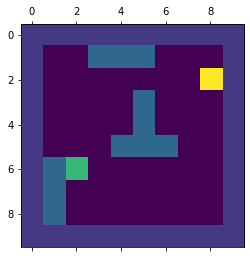

In [7]:
model = PPO1.load("models/fake/{}".format('PPO_WebotFakeMini_TRPO_pj1_nReward2_50000'))
env = MyEnv()
env.render()

34


<Figure size 720x720 with 0 Axes>

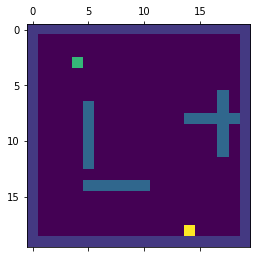

<Figure size 720x720 with 0 Axes>

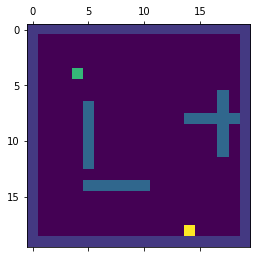

<Figure size 720x720 with 0 Axes>

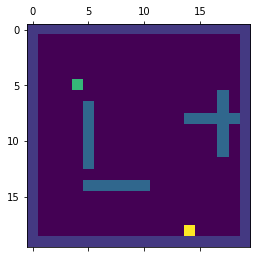

<Figure size 720x720 with 0 Axes>

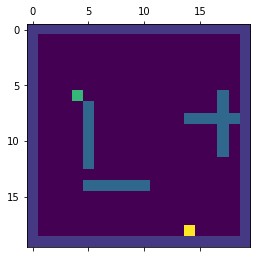

<Figure size 720x720 with 0 Axes>

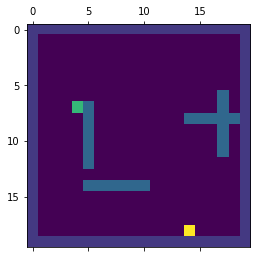

<Figure size 720x720 with 0 Axes>

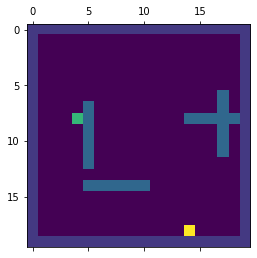

<Figure size 720x720 with 0 Axes>

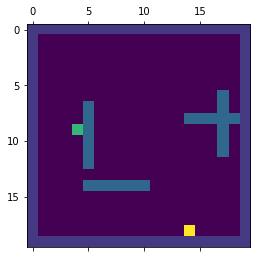

<Figure size 720x720 with 0 Axes>

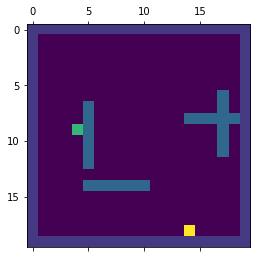

<Figure size 720x720 with 0 Axes>

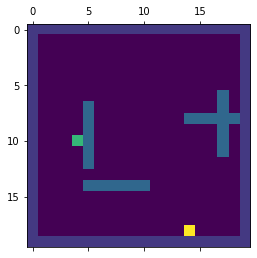

<Figure size 720x720 with 0 Axes>

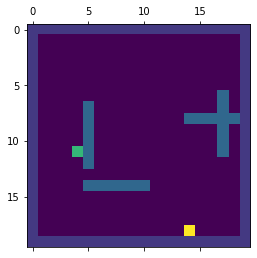

<Figure size 720x720 with 0 Axes>

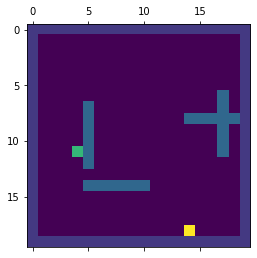

<Figure size 720x720 with 0 Axes>

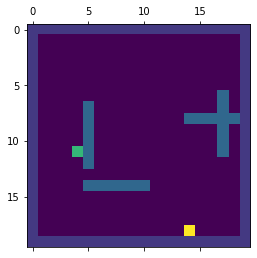

<Figure size 720x720 with 0 Axes>

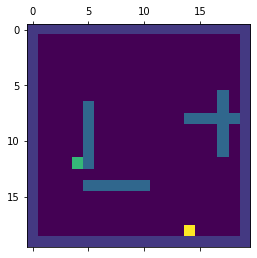

<Figure size 720x720 with 0 Axes>

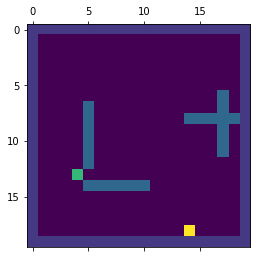

<Figure size 720x720 with 0 Axes>

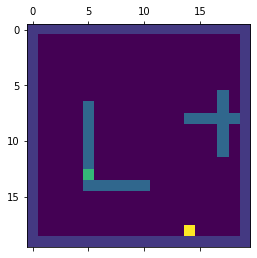

<Figure size 720x720 with 0 Axes>

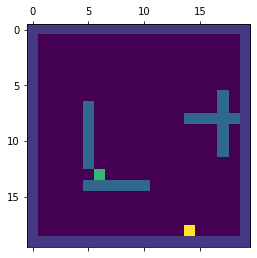

<Figure size 720x720 with 0 Axes>

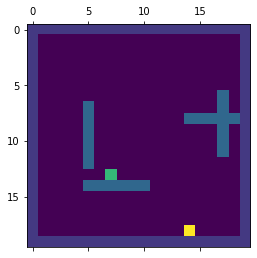

<Figure size 720x720 with 0 Axes>

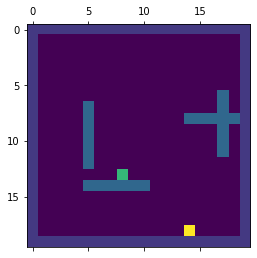

<Figure size 720x720 with 0 Axes>

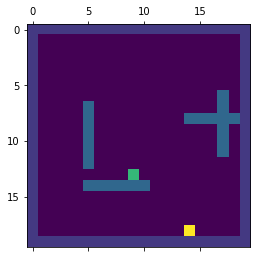

<Figure size 720x720 with 0 Axes>

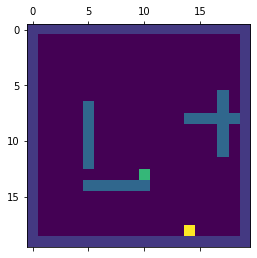

<Figure size 720x720 with 0 Axes>

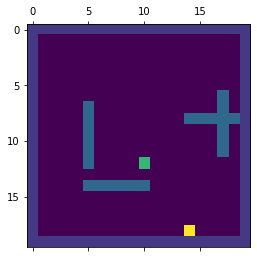

<Figure size 720x720 with 0 Axes>

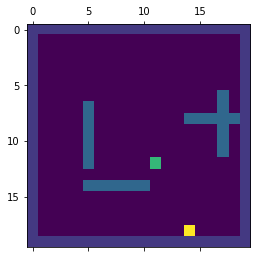

<Figure size 720x720 with 0 Axes>

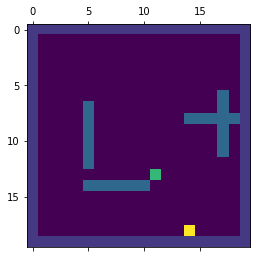

<Figure size 720x720 with 0 Axes>

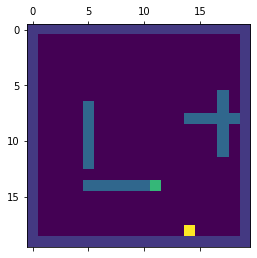

<Figure size 720x720 with 0 Axes>

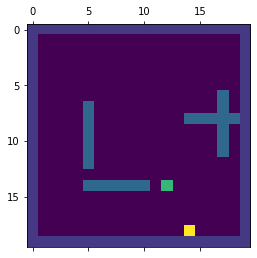

<Figure size 720x720 with 0 Axes>

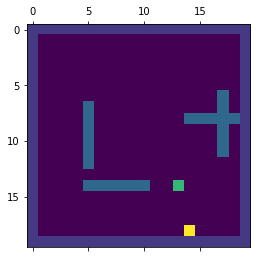

<Figure size 720x720 with 0 Axes>

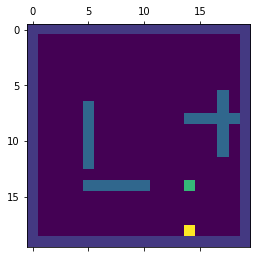

<Figure size 720x720 with 0 Axes>

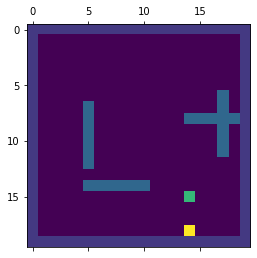

<Figure size 720x720 with 0 Axes>

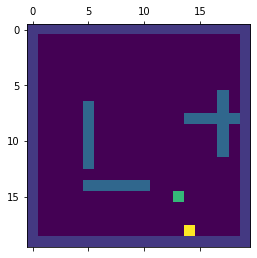

<Figure size 720x720 with 0 Axes>

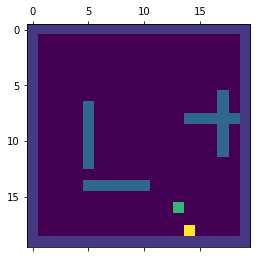

<Figure size 720x720 with 0 Axes>

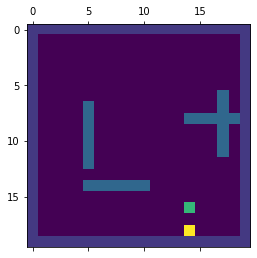

<Figure size 720x720 with 0 Axes>

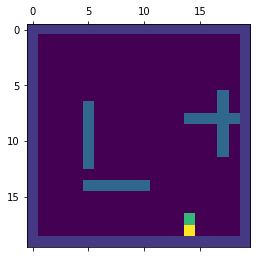

<Figure size 720x720 with 0 Axes>

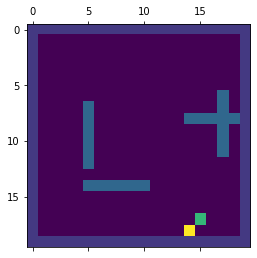

<Figure size 720x720 with 0 Axes>

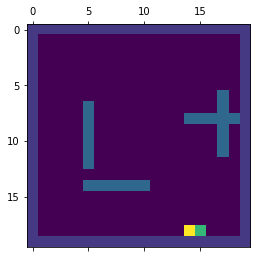

<Figure size 720x720 with 0 Axes>

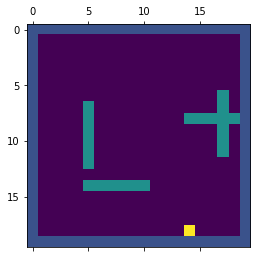

In [12]:
env = MyEnv(N=20, seed=1234)
obs = env.reset()
for _ in range(200):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done is True:
        print(_)
        break